# Resilient Distributed Dataset (RDD)

RDD - fundamental building block/data structure of PySpark. RDDs are immutable, fault-tolerant collection of objects. 

RDD can be compared with the Python lists. Unlike Python lists, RDDs are being computed on several processes distributed across multiple physical servers (nodes) in a cluster. RDDs are the main logical data units in Spark.

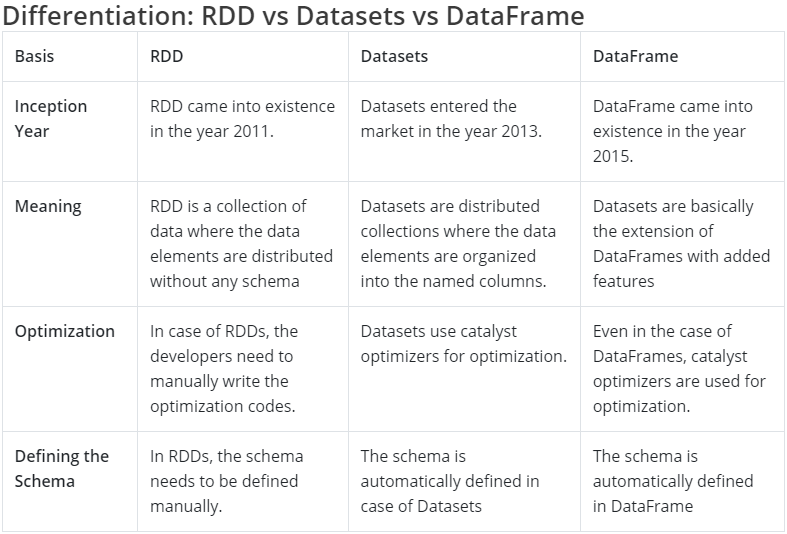


There are only TWO operations that can be done on the RDDs - TRANSFORMATIONS and ACTIONS. 

---------------

Transformations - one RDD as an input --> one new RDD as an output by applying some function or operation on an initial RDD.

Actions - operations that trigger the computation on the RDD and return the results.

More about transformations and actions [here](https://data-flair.training/blogs/spark-rdd-operations-transformations-actions/)

---------------

The main applications of RDDs are data processing, ML, straming, graph processing

RDDs can be created in two different ways:

- Using parallelization of an existing collection

- Referencing a dataset in an external storage system

In [1]:
# Import modules

from pyspark.sql import SparkSession
import multiprocessing

In [2]:
# Create spark session

spark = SparkSession.builder.appName('RDDTest').getOrCreate()

print(spark)

### RDD Creation

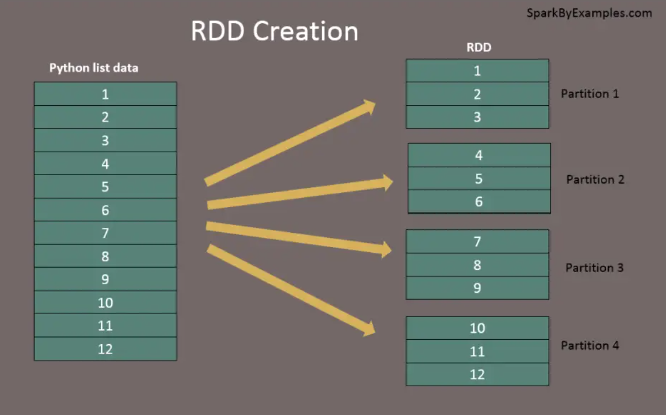

**By running RDDs on the local machine (laptop) the data will be split in partitions based on the amount of logical processors (Ctrl + Shift + Esc)**

In [3]:
# Simple list parallelization 

data = [1, 2, 4, 5, 1, 6, 12, 67, 76, 17, 43]

rdd = spark.sparkContext.parallelize(data)

print('Number of logical processors (CPUs):', multiprocessing.cpu_count())
print('Number of RDD partitions: ', rdd.getNumPartitions())
print(rdd)

Number of logical processors (CPUs): 16
Number of RDD partitions:  16
ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:287


In [5]:
# Manual list parallelization

rdd_manual = spark.sparkContext.parallelize(data, 10) # use 10 processors only

print('Number of RDD partitions: ', rdd_manual.getNumPartitions())

Number of RDD partitions:  10


### Repartition & Coalesce

Both are methods for changing the number of paritions in the dataset.

**Repartition** - shuffling data from all nodes/all the network (full shuffle). 


**Coalesce** - shuffling data from minimum nodes --> minimization of partitions in the dataset. If possible, it will avoid a full shuffle of the data. 

Usually, coalesce is faster that repartition. 



In [ ]:
# Repartition & Coalesce

